# Video Game Market Research

**Description**

Online shop 'V-games' sells video games all over the world. It has the data about video games market before 2016. They'd like to find out what kind of games will gain the popularity in 2017. It will allow the shop to place a bet on a potentially popular product and plan advertising campaigns.

**The aim of research:** to establish the main characteristics of a video game that will be the most profitable in 2017

**Objectives of an issue:**
- to make a research of video game market and find out the markets' trends
- to analyze the consumer profiles from different regions
- to check the hypothesis: 'The average user ratings of the platforms Xbox One и PC are the same' and 'The average user ratings of the genres Action and Sports are different'.

**Content:**
1. [Reading and understanding data](#Step1)
2. [Data preparation](#Step2)
3. [Explanatory data analysis](#Step3) <br />

    3.1. [The dependence of the number of games on the year of release](#Step3.1)<br />
    3.2. [The dependence of the platform on the year of release](#Step3.2)<br />
    3.3. [Perspective platforms](#Step3.3)<br />
    3.4. [The dependence of total_sales on the user_score and critic_score](#Step3.4)<br />
    3.5. [The dependence of total_sales on the genre of a game](#Step3.5)<br />
    <br />
4. [The user profile](#Step4)<br />

    4.1 [The dependence of the platform on the region](#Step4.1)<br />
    4.2.[The dependence of the genre on the region](#Step4.2)<br />
    4.3.[The dependence of the ESRB rating on the sales in the regions](#Step4.3)<br />
    <br />
5. [Statistical hypothesis testing](#Step5)<br />

    5.1.[Hypothesis testing: The average user ratings of the platforms Xbox One и PC are the same](#Step5.1)<br />
    5.2.[Hypothesis testing: The average user ratings of the genres Action and Sports are different](#Step5.2)<br />
    <br />
6.[Conclusion](#Step6)<br />
    

<a class="anchor" id="Step1"></a>
##  1. Reading and understanding data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
url = 'https://raw.githubusercontent.com/NegOlga/Project_Video_Games/main/games.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


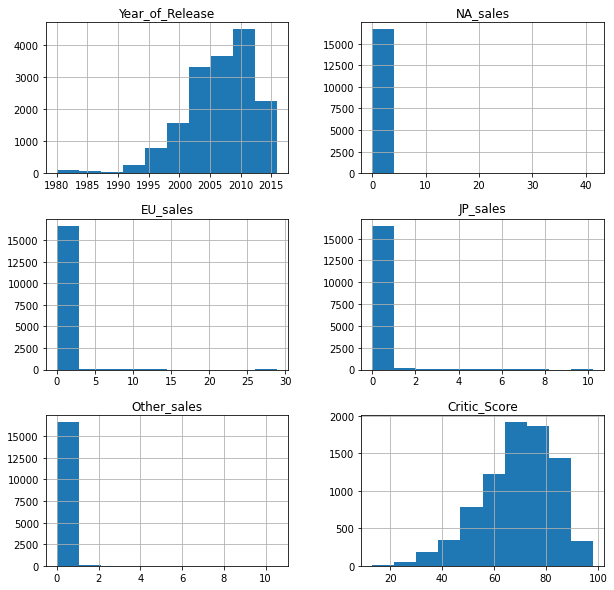

In [5]:
data.hist(figsize=(10,10));

**Conclusion:** Initial dataset contains 16 715 rows and 11 columns. The distribution of datas is near-normal. There are some outliers in the dataset - it's necessary to prepare the datas.

<a class="anchor" id="Step2"></a>
## 2. Data preparation

In [6]:
data.columns = map(str.lower, data.columns)

In [7]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()

In [8]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
#convert the data type
data['year_of_release'].astype('int',errors='ignore')
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')

In [10]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [12]:
#Summary of revenues by region
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Need to fill data gaps. The gaps are in the columns name, year_of_release, genre, critic_score, user_score, rating.

In [13]:
#data gaps
nulls = pd.DataFrame(columns=['names'], data=data.columns)
nulls['nulls'] = data.isna().sum().values
nulls['nulls,%'] = data.isna().sum().values * 100/data.shape[0]
nulls['nulls,%']= round(nulls['nulls,%'], 2)
display(nulls)

,names,nulls,"nulls,%"
0,name,2,0.01
1,platform,0,0.00
2,year_of_release,269,1.61
3,genre,2,0.01
4,na_sales,0,0.00
5,eu_sales,0,0.00
6,jp_sales,0,0.00
7,other_sales,0,0.00
8,critic_score,8578,51.32
9,user_score,9125,54.59


In [14]:
#NAME:the proportion of missing data is less than 1%. Should delete this rows from a dataset.
#GENRE: missimg data are in the same rows
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [15]:
data = data.query('index != [659,14244]')

In [16]:
#YEAR_OF_RELEASE
#enriching the data in the year_of_release column
data[data['year_of_release'].isna()].shape

(269, 12)

In [17]:
#explore the missing data
data[data['year_of_release'].isna()]['platform'].unique()

array(['ps2', 'wii', '2600', 'x360', 'gba', 'pc', 'ps3', 'ps', 'psp',
       'xb', 'gb', 'ds', 'gc', '3ds', 'n64', 'psv'], dtype=object)

The support of the most platforms has been discontinued. 

We should fill the gaps for the platforms that were actual in 2016. They are pc, ps3, 3ds, x360 and psv.

In [18]:
#upload data
new_data = data[(data['year_of_release'].isna()) & (data['platform'].isin(['pc', 'ps3', '3ds', 'x360', 'psv']))]\
                                                    [['name','platform','year_of_release']]

In [19]:
new_data.to_csv('C:\\Users\\nolga\\Desktop\\new_data.csv')

In [20]:
#load the enriched data
url = 'https://raw.githubusercontent.com/NegOlga/Project_Video_Games/main/new_data.xlsx'
new_data = pd.read_excel(url, index_col=0)

In [21]:
new_data.head()

,name,platform,year_of_release
16293,akb1/48: idol to guam de koishitara...,x360,2011
9485,street fighter iv,pc,2009
16348,agarest senki: re-appearance,ps3,2009
8023,star trek: legacy,x360,2006
6861,singularity,ps3,2010


In [22]:
data = data.merge(new_data, on=['name','platform'], how='left')
data.head()

,name,platform,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,year_of_release_y
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,NaN
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,NaN
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,NaN


In [23]:
#transfer tha data from the column year_of_release_y to the column year_of_release_x
def test(x):
    if pd.isnull(x[2]):
        x[2] = x[-1]
    return x

data = data.apply(test, axis=1)

In [24]:
data = data.drop('year_of_release_y', axis=1)

In [25]:
data = data.rename(columns={'year_of_release_x': 'year_of_release'})

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16525 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


In [27]:
#delete the rows which contain null values in the column year_of_release
data = data.loc[~pd.isnull(data['year_of_release'])]

In [28]:
data['year_of_release'] = data['year_of_release'].astype('int')

The missing values in the columns critic score and user_score can't be filled on the base of initial dataset.

In [29]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

The meaning of the values in the column 'rating':

- E - everyone
- M - mature 17+
- T - teenagers
- Е10+ - everyone(10+)
- К-А - for everyone, new ver: E
- АО - only for adults
- ЕС - for kids
- RP - rating pending

In [30]:
#fill the gaps with the meaning 'RP'
data['rating'] = data['rating'].where(~data['rating'].isna(), 'RP')

In [31]:
#change 'K-A' on 'Е'
data['rating'] = data['rating'].str.replace('K-A', 'E')

In [32]:
data['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

In [33]:
#enlarge the categories
def categorize(data):
    if data['rating'] == 'E':
        return 'no limits'
    elif data['rating'] == 'EC':
        return 'for children'
    elif data['rating'] == 'T' or data['rating'] == 'E10+':
        return 'for teenagers'
    elif data['rating'] == 'M' or data['rating'] == 'AO':
        return 'for adults'
    elif data['rating'] == 'RP':
        return 'rating is absent'

In [34]:
data['category_of_rating'] = data.apply(categorize, axis=1)

In [35]:
data['category_of_rating'].unique()

array(['no limits', 'rating is absent', 'for adults', 'for teenagers',
       'for children'], dtype=object)

In [36]:
#check the duplicates
data[data[['name','platform','year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,category_of_rating
16228,madden nfl 13,ps3,2012,sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01,no limits


In [37]:
data[(data['name'] == 'madden nfl 13') & (data['platform'] == 'ps3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,category_of_rating
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56,no limits
16228,madden nfl 13,ps3,2012,sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01,no limits


In [38]:
#drop duplicates
data = data.query("index not in [16228]")

In [39]:
print(f'The number of rows after data preparing: {data.shape[0]}')
#initial count of rows - 16 715 rows, now it's 16 524
print(f'The percentage of data which remained after data preparing: {round(16524/16715*100, 2)}')

The number of rows after data preparing: 16524
The percentage of data which remained after data preparing: 98.86


**Conclusion:** we deleted the duplicates and corrected the missing data. Data loss was less than 5%.

In [40]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16524 entries, 0 to 16712
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                16524 non-null  object 
 1   platform            16524 non-null  object 
 2   year_of_release     16524 non-null  int32  
 3   genre               16524 non-null  object 
 4   na_sales            16524 non-null  float64
 5   eu_sales            16524 non-null  float64
 6   jp_sales            16524 non-null  float64
 7   other_sales         16524 non-null  float64
 8   critic_score        8039 non-null   float64
 9   user_score          7518 non-null   float64
 10  rating              16524 non-null  object 
 11  total_sales         16524 non-null  float64
 12  category_of_rating  16524 non-null  object 
dtypes: float64(7), int32(1), object(5)
memory usage: 1.7+ MB


<a class="anchor" id="Step3"></a>
## 3. Explanatory Data Analysis

<a class="anchor" id="Step3.1"></a>
### 3.1. The dependence of the number of games on the year of release

In [41]:
#number of games by year_of_release
games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
games_per_year.columns = ['year_of_release', 'games_count']

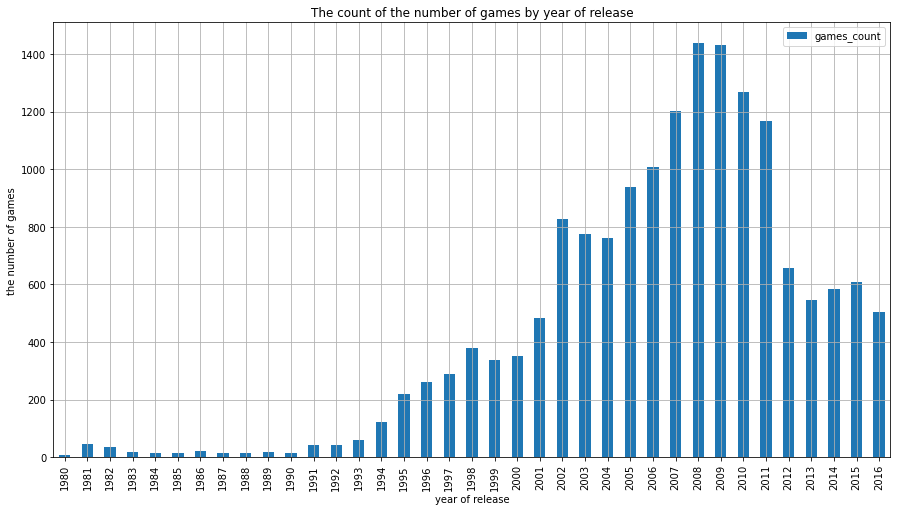

In [42]:
games_per_year.plot(x='year_of_release', y='games_count', kind='bar', figsize=(15,8), grid=True,\
                   title='The count of the number of games by year of release')

plt.xlabel('year of release')
plt.ylabel('the number of games')
plt.show()

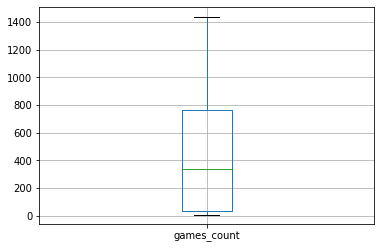

In [43]:
games_per_year.boxplot('games_count')
plt.show()

Conclusion: The peak number of released games was in 2008. We've seen a decrease in the number of released games since 2009.

<a class="anchor" id="Step3.2"></a>
### 3.2. The dependence of the platform on the year of release

In [44]:
#top 10
data_games_top_platform = data.pivot_table(
    index='platform',
    values='total_sales',
    aggfunc='sum'). reset_index()

data_games_top_platform = data_games_top_platform.sort_values(by='total_sales', ascending=False).head(10)
top_platforms_list = list(data_games_top_platform['platform'])
print('Top-10 of platforms:', top_platforms_list)
data_games_top_platform.head(5)

Top-10 of platforms: ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp', 'pc']


,platform,total_sales
16,ps2,1233.56
28,x360,971.42
17,ps3,939.64
25,wii,891.18
4,ds,802.78


In [45]:
#distribution of the platform sales by years
data_platform_per_year = data.pivot_table(
    index = ['platform','year_of_release'],
    values = 'total_sales',
    aggfunc = 'sum').reset_index()
data_platform_per_year.head()

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27


In [46]:
data_platform_per_year = data_platform_per_year.query('platform in @top_platforms_list')

In [47]:
grouped_table_platform = data_platform_per_year.groupby('platform').agg({'year_of_release':['min', 'max']})
grouped_table_platform['time'] = grouped_table_platform['year_of_release']['max'] -\
grouped_table_platform['year_of_release']['min']

In [48]:
print('The lifetime of platform is', round(grouped_table_platform['time'].median()), 'years in average')

The lifetime of platform is 10 years in average


In [49]:
data_platform_per_year['platform'].unique()

array(['ds', 'gba', 'pc', 'ps', 'ps2', 'ps3', 'ps4', 'psp', 'wii', 'x360'],
      dtype=object)

In [50]:
def plot_platform_life(platform_name=[]):
    plt.plot(round(data_platform_per_year.loc[data_platform_per_year['platform'] == platform_name, "year_of_release"]),\
         data_platform_per_year.loc[data_platform_per_year['platform'] == platform_name, "total_sales"] ,linewidth=3,\
        label= f'{platform_name}')

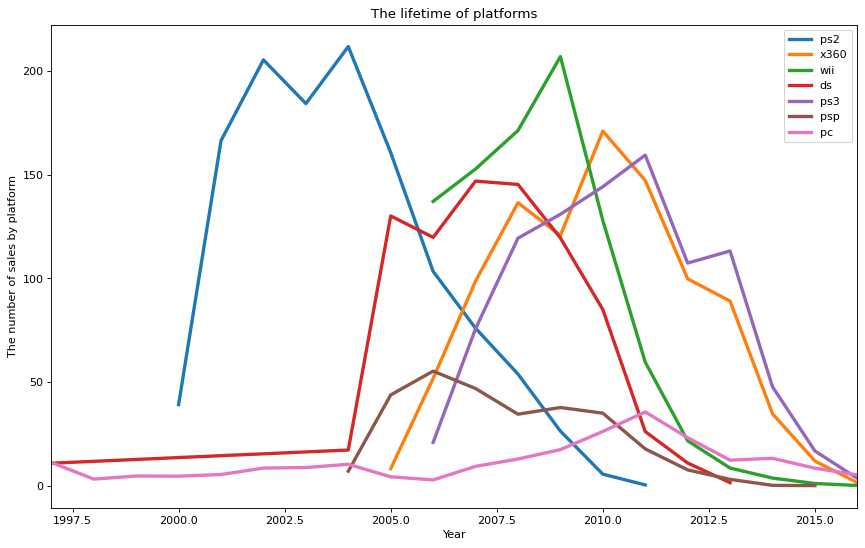

In [51]:
plt.figure(figsize=(13,8), dpi=80)

plot_platform_life(platform_name='ps2')
plot_platform_life(platform_name='x360')
plot_platform_life(platform_name='wii')
plot_platform_life(platform_name='ds')
plot_platform_life(platform_name='ps3')
plot_platform_life(platform_name='psp')
plot_platform_life(platform_name='pc')

plt.xlabel('Year')
plt.xlim(1997,2016)
plt.ylabel('The number of sales by platform')

plt.title('The lifetime of platforms')
plt.legend()
plt.show()


The number of platforms increased since 2004. The new platforms appears almost every 2 years.

<a class="anchor" id="Step3.3"></a>
### 3.3. Perspective platforms

To detect the most perspective platforms we make the restrictions on the dataset. To find out the most up-to-date trends we take into account the datas for the last 3 years - 2014, 2015, 2016.

In [52]:
data_games_after_2014 = data[data['year_of_release'] >=2014]

In [53]:
pivot_sales_per_year = data_games_after_2014.pivot_table(
    index = 'platform',
    columns = 'year_of_release',
    values = 'total_sales',
    aggfunc = 'sum')
pivot_sales_per_year

year_of_release,2014,2015,2016
platform,,,
3ds,43.85,27.80,15.14
pc,13.28,8.53,5.26
ps3,47.76,16.82,3.60
ps4,100.00,118.90,69.25
psp,0.24,0.12,NaN
psv,11.90,6.25,4.25
wii,3.75,1.14,0.18
wiiu,22.03,16.35,4.60
x360,34.77,11.96,1.52


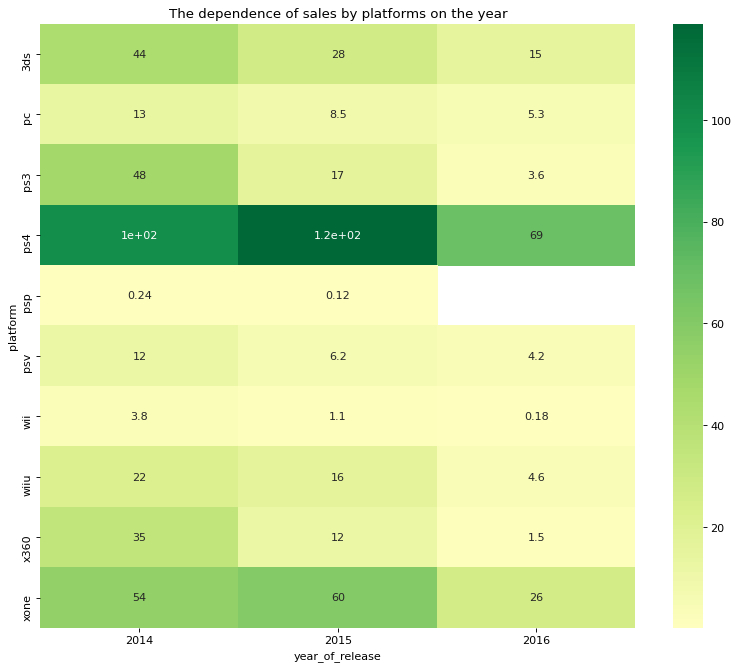

In [54]:
# heatmap
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(pivot_sales_per_year, cmap='RdYlGn', center=0, annot=True);
plt.title('The dependence of sales by platforms on the year');

We make the assumption that the data for 2016 is not complete and unrepresentative.
We can make the following conclusions:

- Sales grow: PS4, XOne
- Sales fall: 3DS, PC, PS3, PSP, PSV, Wii, WiiU, X360

In [55]:
#top-5 platforms by sales
display(data_games_after_2014.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5))

platform
ps4     288.15
xone    140.36
3ds      86.79
ps3      68.18
x360     48.25
Name: total_sales, dtype: float64

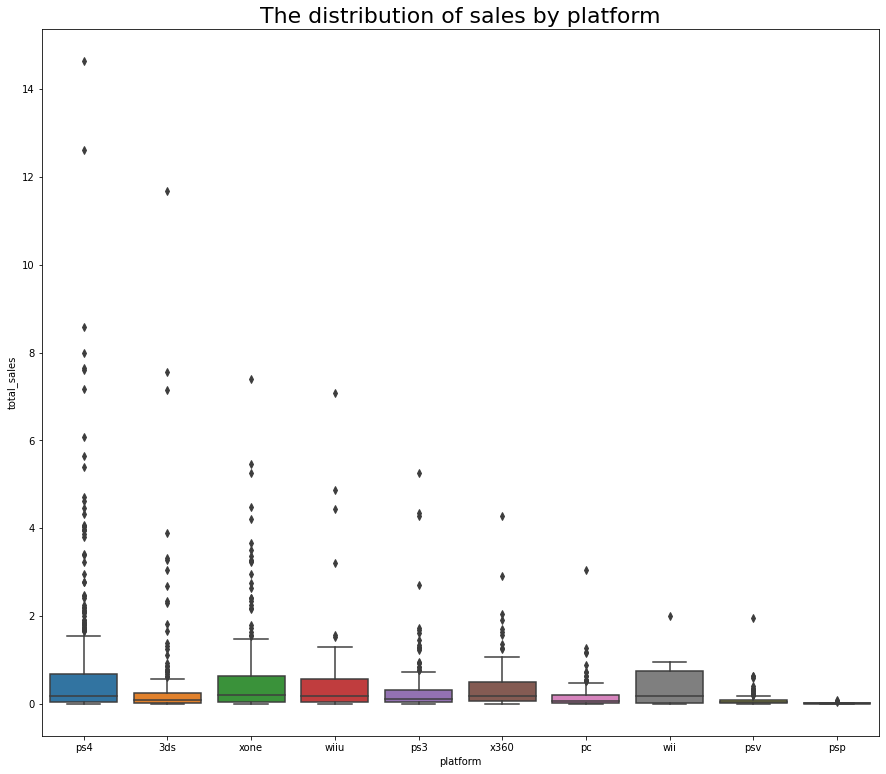

In [56]:
plt.figure(figsize=(15,13))
sns.boxplot(x='platform', y='total_sales', data=data_games_after_2014)    

        
plt.title('The distribution of sales by platform', fontsize=22)
plt.show()

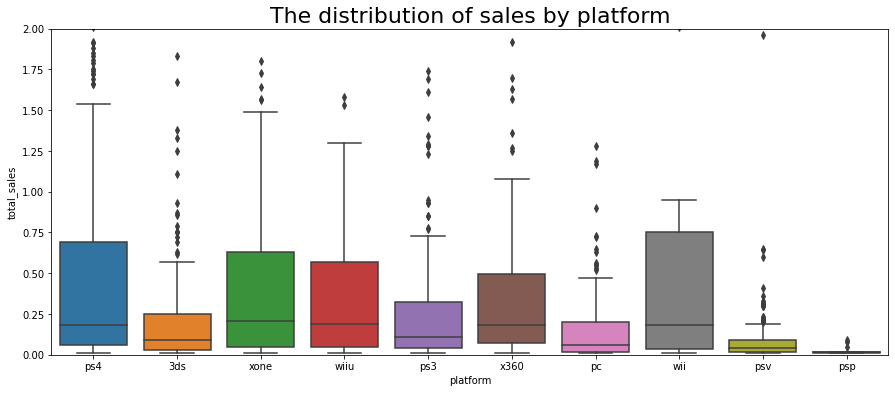

In [57]:
#limit outliers
plt.figure(figsize=(15,6))
sns.boxplot(x='platform', y='total_sales', data=data_games_after_2014)    

plt.ylim(0,2)
plt.title('The distribution of sales by platform', fontsize=22)
plt.show()

There are many outliers in the data. The reason for this is that some games were popular and have brought the revenue which is above the median revenue of games on the platform. The biggest number of hit games were on the PS4, 3DS and XOne platforms. The median income is the highest for Wii, X360 and XOne.

Conclusion: XOne is a perspective platform that ranks in the top-5 of overall sales, it has a high median revenue and also a lot of hit games. PS4 is also in the top-5 and it has a lot of hit games, but the median revenue per game on the platform is lower than on the XOne and X360. Other platforms in the top-5 decline sales.

<a class="anchor" id="Step3.4"></a>
### 3.4. The dependence of total_sales on the user_score and critic_score

We explore the correlation on the base of platform XOne.

In [58]:
data_games_xone = data_games_after_2014[data_games_after_2014['platform'] == 'xone']

In [59]:
#correlation between sales and user_score
data_games_after_2014['user_score'][data_games_after_2014['platform'] == 'xone'].\
corr(data_games_after_2014['total_sales'][data_games_after_2014['platform'] == 'xone'])

-0.07038392806475809

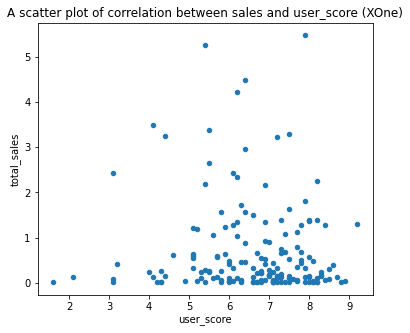

In [60]:
data_games_xone.plot(x='user_score',y='total_sales', kind='scatter', figsize=(6,5),\
                    title='A scatter plot of correlation between sales and user_score (XOne)');

In [61]:
#correlation between sales and criric_score
data_games_xone['critic_score'].corr(data_games_xone['total_sales'])

0.42867694370333187

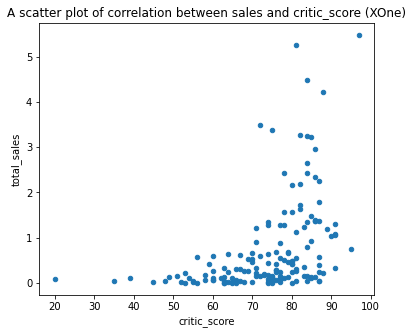

In [62]:
data_games_xone.plot(x='critic_score',y='total_sales', kind='scatter', figsize=(6,5), \
                    title='A scatter plot of correlation between sales and critic_score (XOne)');

Conclusion: for XOne platform:
- the correlation between sales and user_score is absent
- the correlation between sales and critic_score is average but spurious

Check the conclusions

In [63]:
print('Correlation between sales and user_score:')
for x in data_games_after_2014['platform'].unique():
    print(x, round(data_games_after_2014['user_score'][data_games_after_2014['platform'] == x].corr\
                   (data_games_after_2014['total_sales'][data_games_after_2014['platform'] == x]),2))

Correlation between sales and user_score:
ps4 -0.04
3ds 0.23
xone -0.07
wiiu 0.41
ps3 -0.17
x360 -0.14
pc -0.08
wii 1.0
psv -0.17
psp nan


In [64]:
print('Total correlation between sales and user_score:',
      round(data_games_after_2014['user_score'].corr(data_games_after_2014['total_sales']),2))

Total correlation between sales and user_score: -0.01


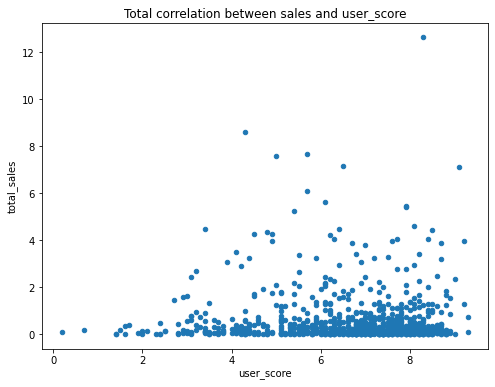

In [65]:
data_games_after_2014.plot(x='user_score', y='total_sales', kind='scatter',figsize=(8,6),\
                           title='Total correlation between sales and user_score');

In [66]:
print('Correlation between sales and critic_score:')
for x in data_games_after_2014['platform'].unique():
    print(x, round(data_games_after_2014['critic_score'][data_games_after_2014['platform'] == x].corr\
                   (data_games_after_2014['total_sales'][data_games_after_2014['platform'] == x]),2))

Correlation between sales and critic_score:
ps4 0.4
3ds 0.31
xone 0.43
wiiu 0.37
ps3 0.45
x360 0.53
pc 0.17
wii nan
psv 0.04
psp nan


In [67]:
print('Total correlation between sales and critic_score:',
      round(data_games_after_2014['critic_score'].corr(data_games_after_2014['total_sales']),2))

Total correlation between sales and critic_score: 0.33


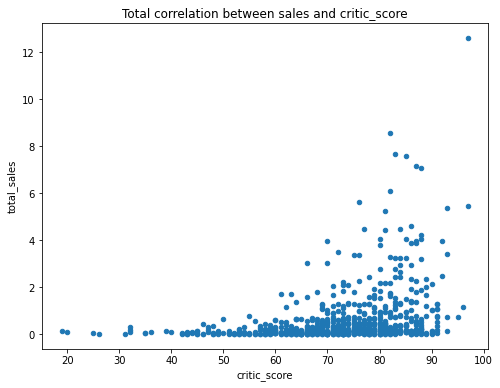

In [68]:
data_games_after_2014.plot(x='critic_score', y='total_sales', kind='scatter',figsize=(8,6), \
                           title='Total correlation between sales and critic_score');

Conclusion: the conclusions are approved.

<a class="anchor" id="Step3.5"></a>
### 3.5. The dependence of total_sales on the genre of a game

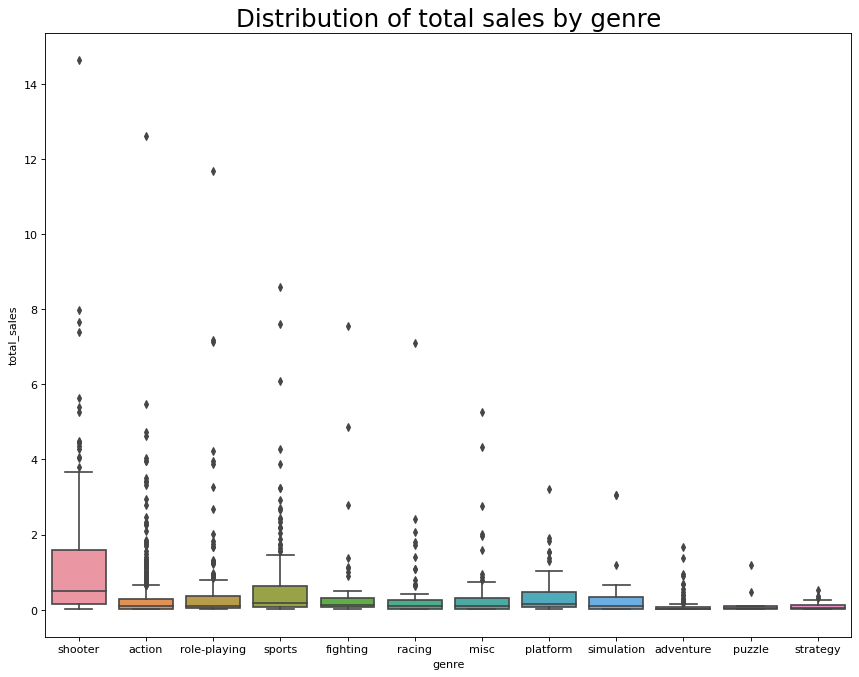

In [69]:
#distribution of total_sales by genre
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='genre', y='total_sales', data=data_games_after_2014, notch=False)

        
plt.title('Distribution of total sales by genre', fontsize=22)
plt.show()

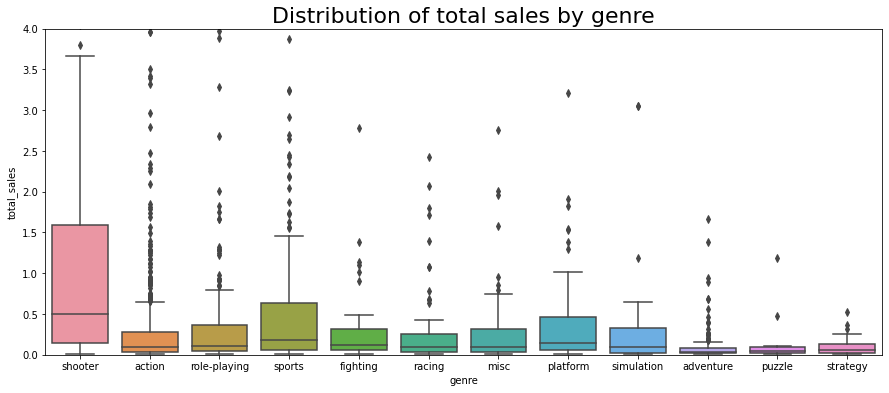

In [70]:
plt.figure(figsize=(15,6))
sns.boxplot(x='genre', y='total_sales', data=data_games_after_2014)    

plt.ylim(0,4)
plt.title('Distribution of total sales by genre', fontsize=22)
plt.show()

Conclusion: we looked at the distribution of total_sales by genre of a game.
We can draw the following conclusions:
- Shooter and Sports are the most profitable genres. There are a lot of popular games which bring high income. An average game of these genre also has a high median income.
- Action and Shooter games gain the popularity more othen than other games, that's why these genres bring more income.
- The most unpopular genres are puzzle, strategy and adventure.

**FINFL CONCLUSION (chapter 3)**: 

- Can be mentioned a trend to decrease the number of games since 2009
- The most perspective platform in 2016 is XOne. Most of the hit games were released on PS4, 3DS and XOne. The median income is higher for the platforms Wii, X360 and XOne.
- The scores from critics and users don't have an influence on total sales.
- Shooter and Sport are the most profitable genres. Shooter and Sport games gain the popularity more othen than other games, that's why these genres bring more income.
- The most unpopular genres are puzzle, strategy and adventure.

<a class="anchor" id="Step4"></a>
## 4. The User profile

<a class="anchor" id="Step4.1"></a>
### 4.1. The dependence of the platform on the region

In [71]:
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    colours = {'ps4': 'C0',
               'xone': 'C1',
               'x360': 'C2',
               '3ds': 'C3',
               'wiiu': 'C4',
               'Other': 'C5',
               'ps3': 'C6',
               'pc': 'C7',
               'psv': 'C8'}
    
    labels = sales.platform
    
    sales.columns = ['platform', 'sales']
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, labels = sales.platform,
               
               legend=False, 
               title = f"The popularity of platforms in {name} ",
               ax = axes,
               colors=[colours[key] for key in labels]).set(ylabel='')
    
    plt.tight_layout()
    


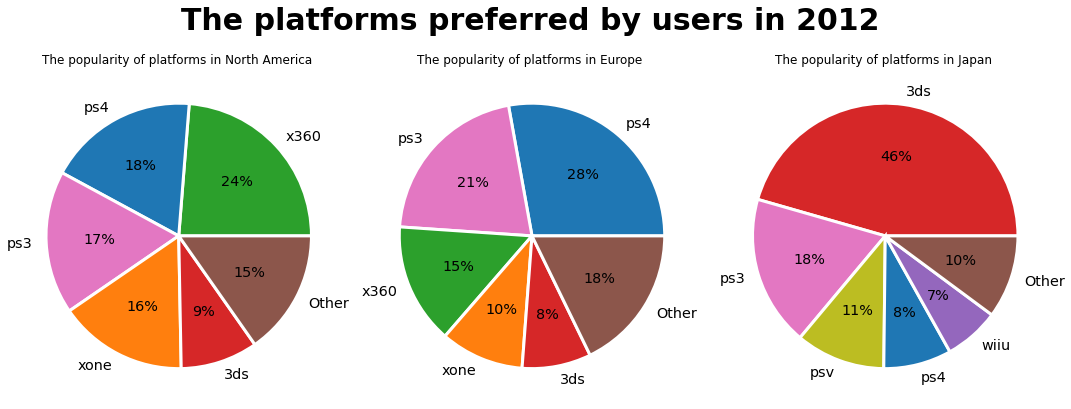

In [72]:
#popular platform in 2012
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle("The platforms preferred by users in 2012 ", fontsize = 30, fontweight='bold')

x_year = 2012

graph(data, x_year, 'na_sales', 'North America', axes[0])
graph(data, x_year,'eu_sales', 'Europe', axes[1])
graph(data, x_year, 'jp_sales', 'Japan', axes[2])

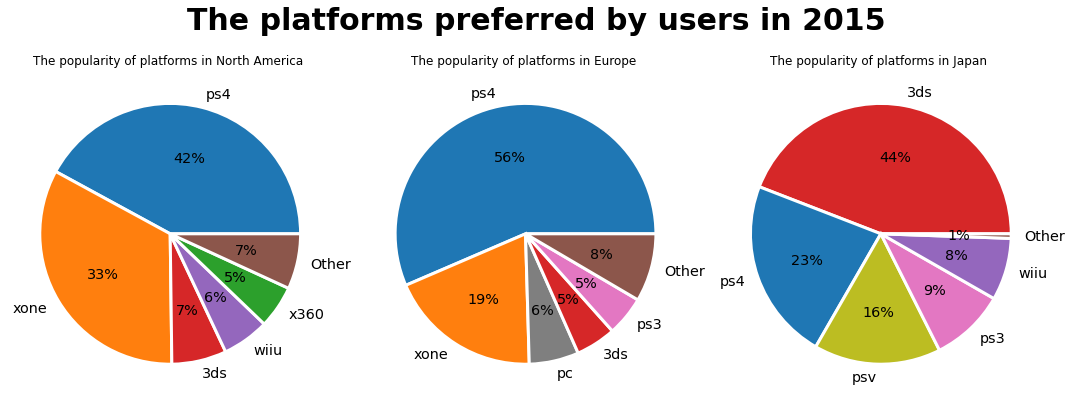

In [73]:
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('The platforms preferred by users in 2015', fontsize = 30, fontweight='bold')

x_year = 2015


graph(data_games_after_2014, x_year, 'na_sales', 'North America', axes[0])
graph(data_games_after_2014, x_year,'eu_sales', 'Europe', axes[1])
graph(data_games_after_2014, x_year, 'jp_sales', 'Japan', axes[2])

Conclusion: The users from different regions have different preferences in platforms. PS4 and XOne are the most popular platforms for users from Europe and North America, 3DS is the most popular for the users from Japan. XOne isn't in the top of the popular platforms in Japan, but PS4 is in top-5 platforms in Japan.

Video game market in Europe and North America became more monopolized to compare with 2012. Two platforms PS4 and XOne have more than 70% of sales in Europe and North America. The structure of japanese market is more stable.

<a class="anchor" id="Step4.2"></a>
### 4.2. The dependence of the genre on the region

In [74]:
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='genre', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'genre': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['genre', 'sales']
    sales.plot(kind='bar',
               x='genre',
               y="sales",
               

               title = f"The popularity of genres in {name} ", 
               ax = axes).set(ylabel='')
    plt.tight_layout()

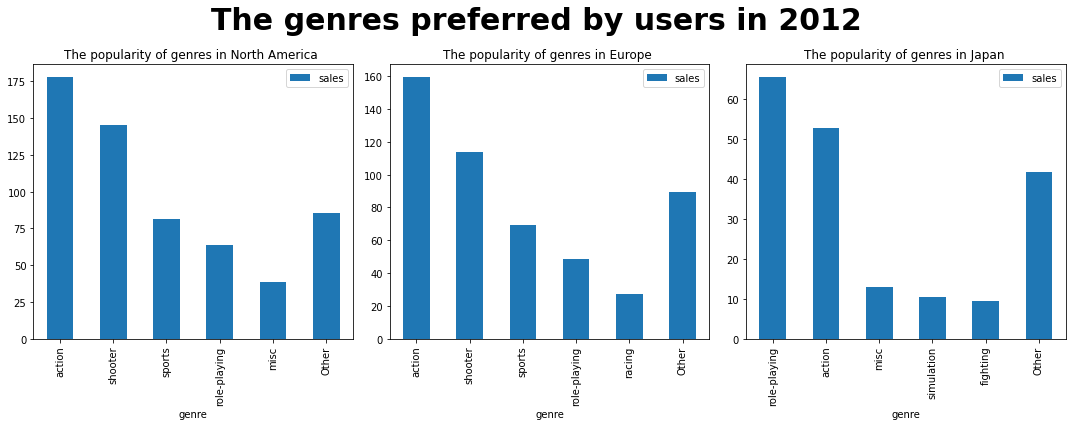

In [75]:
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('The genres preferred by users in 2012', fontsize = 30, fontweight='bold')

x_year = 2012

graph(data, x_year, 'na_sales', 'North America', axes[0])
graph(data, x_year,'eu_sales', 'Europe', axes[1])
graph(data, x_year, 'jp_sales', 'Japan', axes[2])

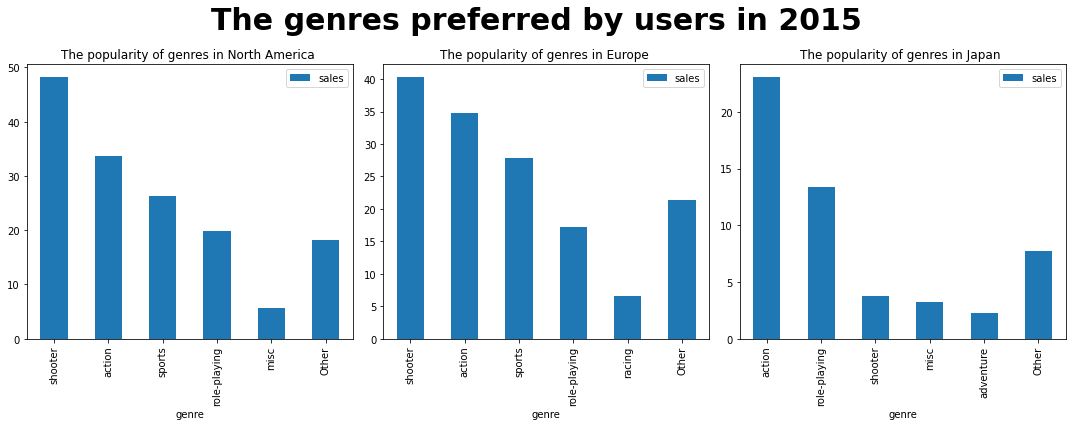

In [76]:
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('The genres preferred by users in 2015', fontsize = 30, fontweight='bold')

x_year = 2015

graph(data_games_after_2014, x_year, 'na_sales', 'North America', axes[0])
graph(data_games_after_2014, x_year,'eu_sales', 'Europe', axes[1])
graph(data_games_after_2014, x_year, 'jp_sales', 'Japan', axes[2])

Conclusion: The preferences of users from Europe and North America differ very slightly. The most popular genres in NA and EU are Shooter, Action and Sport. Japanese users prefer Action and Role-Playing. Shooters are also in top-5 most popular genres in Japan.

The preferences of players in Europe and North America are stable. The preferences of japanese players change but the most popular genres are Action and Role-Playing.

<a class="anchor" id="Step4.3"></a>
### 4.3. The dependence of the ESRB rating on the sales in the regions

If income depends on ESRB rating, the most high income will get the games, which have the most wider audience. There are games from the category 'no limits'. The most low sales should be for the games in category 'rating is absent'.

In [77]:
data_games_after_2014['category_of_rating'].unique()

array(['rating is absent', 'for adults', 'no limits', 'for teenagers'],
      dtype=object)

In [78]:
#ESRB rating: Europe
rating_eu = data_games_after_2014.groupby(by='category_of_rating')['eu_sales'].sum().sort_values(ascending=False)
display(rating_eu)

category_of_rating
for adults          93.44
for teenagers       60.24
rating is absent    58.98
no limits           58.06
Name: eu_sales, dtype: float64

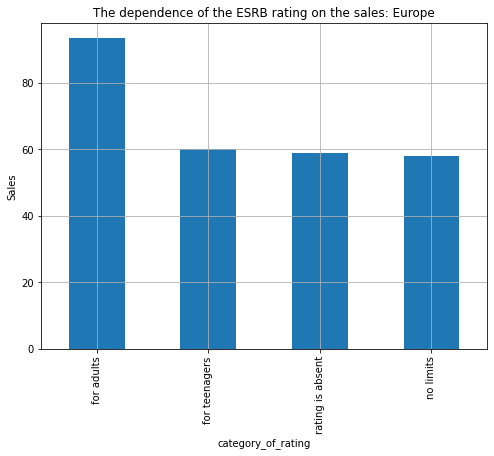

In [79]:
rating_eu.plot(kind='bar',figsize=(8,6), ylabel='Sales', grid=True,\
               title='The dependence of the ESRB rating on the sales: Europe');

In [80]:
#ESRB rating: North America
rating_na = data_games_after_2014.groupby(by='category_of_rating')['na_sales'].sum().sort_values(ascending=False)
display(rating_na)

category_of_rating
for adults          96.43
for teenagers       72.26
rating is absent    64.72
no limits           50.74
Name: na_sales, dtype: float64

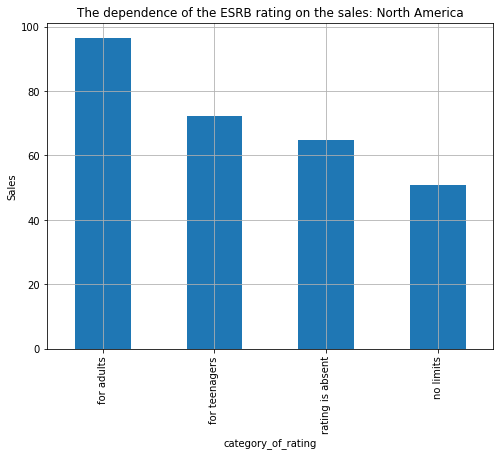

In [81]:
rating_na.plot(kind='bar',figsize=(8,6), ylabel='Sales', grid=True,\
               title='The dependence of the ESRB rating on the sales: North America');

In [82]:
#ESRB rating: Japan
rating_jp = data_games_after_2014.groupby(by='category_of_rating')['jp_sales'].sum().sort_values(ascending=False)
display(rating_jp)

category_of_rating
rating is absent    56.92
for teenagers       19.24
no limits            8.94
for adults           8.01
Name: jp_sales, dtype: float64

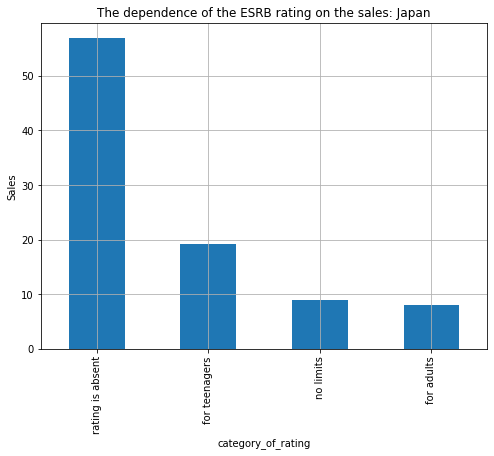

In [83]:
rating_jp.plot(kind='bar',figsize=(8,6),  grid=True, ylabel='Sales',\
               title='The dependence of the ESRB rating on the sales: Japan');

Conclusion: rating ESRB don't have an influence on sales in regions.

**FINFL CONCLUSION (chapter 4)**: 

We can create the following user profiles:
    
- Europe: the most popular platforms are: PS4, XOne, the most popular genres are shooter, action and sport, rating ESRB don't have an influence on sales

- North America: the most popular platforms are: PS4, XOne, the most popular genres are shooter, action and sport, rating ESRB don't have an influence on sales

- Japan: the most popular platforms are: 3DS, PS4, the most popular genres are role-playing, actions, rating ESRB don't have an influence on sales

<a class="anchor" id="Step5"></a>
## 5. Statistical hypothesis testing

<a class="anchor" id="Step5.1"></a>
### 5.1. Hypothesis testing: The average user ratings of the platforms Xbox One и PC are the same

**Тhe null hypothesis:** the average user ratings of the platforms Xbox One и PC are the same

**The alternative hypothesis:** the average user ratings of the platforms Xbox One и PC are not the same

In [84]:
results = st.ttest_ind(
    data_games_after_2014[((data_games_after_2014['platform'] == 'xone') & (~data_games_after_2014['user_score'].isna()))]\
    ['user_score'],
    data_games_after_2014[((data_games_after_2014['platform'] == 'pc') & (~data_games_after_2014['user_score'].isna()))]\
    ['user_score'],
    equal_var = False
)

alpha = 0.05

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print("we can't reject the null hypothesis")

p-value: 0.1376287919530105
we can't reject the null hypothesis


Conclusion: we can't reject the hypothesis 'The average user ratings of the platforms Xbox One и PC are the same'

<a class="anchor" id="Step5.2"></a>
### 5.2 Hypothesis testing: The average user ratings of the genres Action and Sports are different

**Тhe null hypothesis:** the average user ratings of the genres Action and Sports are the same

**The alternative hypothesis:** the average user ratings of the genres Action and Sports are not the same

In [85]:
results = st.ttest_ind(
    data_games_after_2014[((data_games_after_2014['genre'] == 'action') & (~data_games_after_2014['user_score'].isna()))]\
    ['user_score'],
    data_games_after_2014[((data_games_after_2014['genre'] == 'sports') & (~data_games_after_2014['user_score'].isna()))]\
    ['user_score'],
    equal_var = False
)

alpha = 0.05

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print("we can't reject the null hypothesis")

p-value: 1.1825550382644557e-14
Reject the null hypothesis


Conclusion: we can't reject the hypothesis 'The average user ratings of the genres Action and Sports are different'

<a class="anchor" id="Step6"></a>
## 6. Conclusion

In line with the aim of research were established the main factors have an influence on video game market.

There are following trends on the video games market:
- Can be mentioned a trend to decrease the number of games since 2009
- The most perspctive platform in 2016 is XOne. The most games which became the hits were released on the PS4, 3DS and XOne. The median income is highercfor the platforms Wii, X360 and XOne.
- The scores of critics and users don't have an influence on total sales.
- Shooter and Sport are the most profitable genres. Games in genres Action and Shooter gain the popularity more othen than other games, that's why these genres bring more income.
- The most unpopuler genres of games are puzzle, strategy and adventure.

The popularity of games and platforms depends on region. Users profile from regions Europe, North America and Japan were created:

- Europe: the most popular platforms are: PS4, XOne, the most popular genres are shooter, action and sport, rating ESRB don't have an influence on sales

- North America: the most popular platforms are: PS4, XOne, the most popular genres are shooter, action and sport, rating ESRB don't have an influence on sales

- Japan: the most popular platforms are: 3DS, PS4, the most popular genres are role-playing, actions, rating ESRB don't have an influence on sales


We can't reject the hypothesis that the average user ratings of the platforms Xbox One и PC are the same. Also we can't reject the hypothesis that the average user ratings of the genres Action and Sports are different.


So the potantial popular game with high income in 2017 must meet the following criteria:
- should be on the platforms PS4 or XOne
- genre: Shooter